In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mental_health_workplace_survey.csv to mental_health_workplace_survey.csv


In [3]:
df = pd.read_csv('mental_health_workplace_survey.csv')
df = df.drop(columns=['EmployeeID', 'Country'], errors='ignore')


In [4]:
df['HasMentalHealthSupport'] = df['HasMentalHealthSupport'].map({'Yes':1, 'No':0})

In [18]:
subset = ['Age', 'WorkHoursPerWeek', 'SleepHours','TeamSize']
df = df.dropna(subset=subset)

In [20]:
features = ['StressLevel', 'WorkHoursPerWeek', 'HasMentalHealthSupport']
X = df[features]
y = df['BurnoutRisk'].astype(int)

In [ ]:
scaler = StandardScaler()
X[['StressLevel', 'WorkHoursPerWeek']] = scaler.fit_transform(X[['StressLevel', 'WorkHoursPerWeek']])


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print(f"✅ Model Performance using 3 Features:")
print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {auc:.3f}")
print("Confusion Matrix:")
print(cm)

✅ Model Performance using 3 Features:
Accuracy: 0.582
ROC-AUC: 0.530
Confusion Matrix:
[[291 113]
 [138  58]]


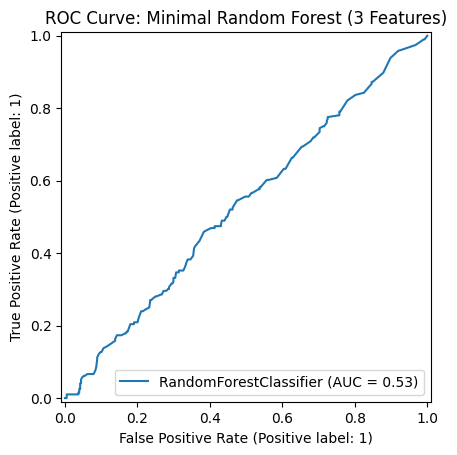

In [26]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve: Minimal Random Forest (3 Features)")
plt.show()